In [1]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import json
import seaborn as sns
import numpy as np

In [2]:
# Load data from all 5 runs

with open("predictions/swag_predictions_test_1.json", "r") as f:
    swag_predictions_1 = json.load(f)
with open("predictions/swag_predictions_test_2.json", "r") as f:
    swag_predictions_2 = json.load(f)
with open("predictions/swag_predictions_test_3.json", "r") as f:
    swag_predictions_3 = json.load(f)
with open("predictions/swag_predictions_test_4.json", "r") as f:
    swag_predictions_4 = json.load(f)
with open("predictions/swag_predictions_test_5.json", "r") as f:
    swag_predictions_5 = json.load(f)

all_swag_preds = [swag_predictions_1, swag_predictions_2, swag_predictions_3, swag_predictions_4, swag_predictions_5]

with open("predictions/swag_predictions_test_v2false_1.json", "r") as f:
    swag_predictions_v2false_1 = json.load(f)
with open("predictions/swag_predictions_test_v2false_2.json", "r") as f:
    swag_predictions_v2false_2 = json.load(f)
with open("predictions/swag_predictions_test_v2false_3.json", "r") as f:
    swag_predictions_v2false_3 = json.load(f)
with open("predictions/swag_predictions_test_v2false_4.json", "r") as f:
    swag_predictions_v2false_4 = json.load(f)
with open("predictions/swag_predictions_test_v2false_5.json", "r") as f:
    swag_predictions_v2false_5 = json.load(f)

# v2false = no "no answer" detection
all_swag_preds_2 = [swag_predictions_v2false_1, swag_predictions_v2false_2, swag_predictions_v2false_3, swag_predictions_v2false_4, swag_predictions_v2false_5]

with open("predictions/swa_predictions_test_1.json", "r") as f:
    swa_predictions_1 = json.load(f)
with open("predictions/swa_predictions_test_2.json", "r") as f:
    swa_predictions_2 = json.load(f)
with open("predictions/swa_predictions_test_3.json", "r") as f:
    swa_predictions_3 = json.load(f)
with open("predictions/swa_predictions_test_4.json", "r") as f:
    swa_predictions_4 = json.load(f)
with open("predictions/swa_predictions_test_5.json", "r") as f:
    swa_predictions_5 = json.load(f)

all_swa_preds = [swa_predictions_1, swa_predictions_2, swa_predictions_3, swa_predictions_4, swa_predictions_5]

with open("predictions/base_predictions_test_1.json", "r") as f:
    baseline_predictions_1 = json.load(f)
with open("predictions/base_predictions_test_2.json", "r") as f:
    baseline_predictions_2 = json.load(f)
with open("predictions/base_predictions_test_3.json", "r") as f:
    baseline_predictions_3 = json.load(f)
with open("predictions/base_predictions_test_4.json", "r") as f:
    baseline_predictions_4 = json.load(f)
with open("predictions/base_predictions_test_5.json", "r") as f:
    baseline_predictions_5 = json.load(f)

all_base_preds = [baseline_predictions_1, baseline_predictions_2, baseline_predictions_3, baseline_predictions_4, baseline_predictions_5]

In [3]:
# Normalize each prediction list separately and transform JSD
for run in all_swag_preds:
    max_levenshtein = max(pred['levenshtein'] for pred in run)
    max_jsd = max(pred['jsd_uncertainty'] for pred in run)

    for pred in run:
        normalized_lev = pred['levenshtein'] / max_levenshtein
        normalized_jsd = pred['jsd_uncertainty'] / max_jsd

        pred['normalized_levenshtein'] = normalized_lev
        pred['normalized_jsd'] = normalized_jsd

        pred['transformed_jsd'] =  pred['normalized_jsd'] ** 0.75
        pred['transformed_levenshtein'] =  pred['normalized_levenshtein'] ** 0.75


# Repeat for second set
for run in all_swag_preds_2:
    max_levenshtein = max(pred['levenshtein'] for pred in run)
    max_jsd = max(pred['jsd_uncertainty'] for pred in run)

    for pred in run:
        normalized_lev = pred['levenshtein'] / max_levenshtein
        normalized_jsd = pred['jsd_uncertainty'] / max_jsd

        pred['normalized_levenshtein'] = normalized_lev
        pred['normalized_jsd'] = normalized_jsd
        
        pred['transformed_jsd'] =  pred['normalized_jsd'] ** 0.75
        pred['transformed_levenshtein'] =  pred['normalized_levenshtein'] ** 0.75

In [4]:
# set params for plots

plt.rcParams.update({
    'font.size': 20,
    'axes.titlesize': 20,
    'axes.labelsize': 20,
    'legend.fontsize': 20,
    'legend.title_fontsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
})

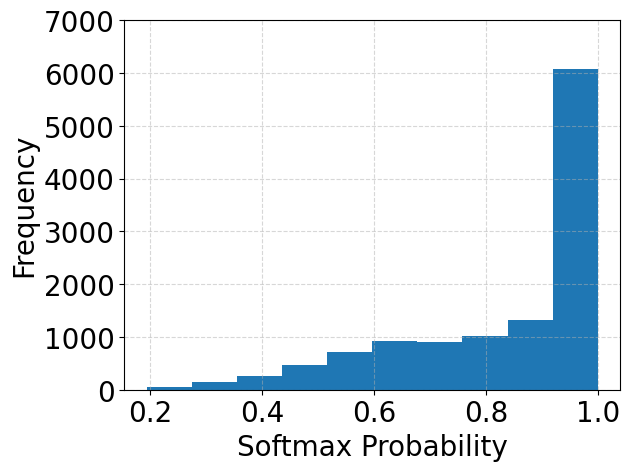

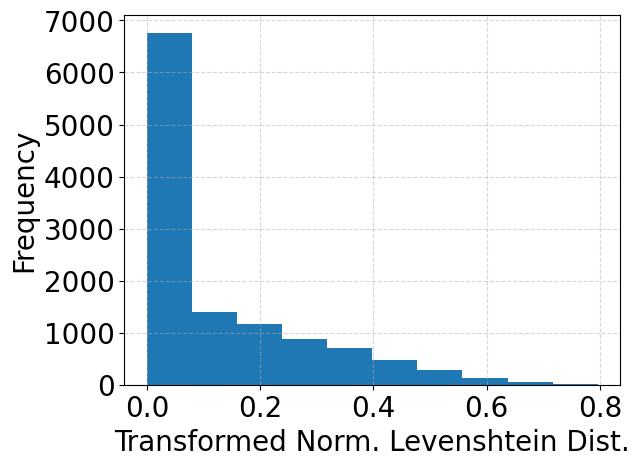

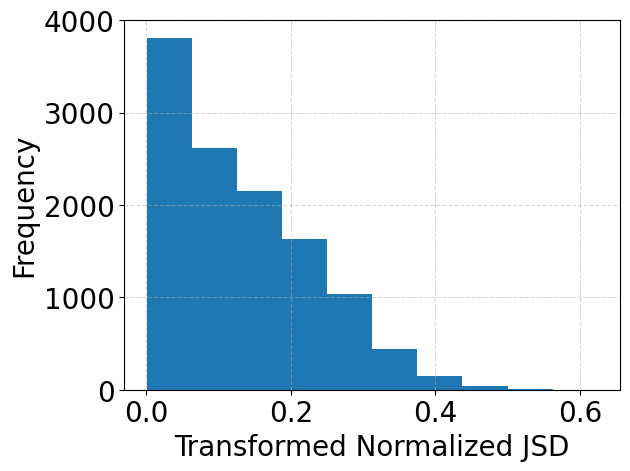

In [5]:
# Plot mean distributions for metrics over 5 runs

mean_softmax = []
mean_levenshtein = []
mean_jsd = []

# Compute the mean of normalized values across all predictions
for i in range(len(all_swag_preds[0])):
    softmax_values = [pred[i]['softmax'] for pred in all_swag_preds]
    levenshtein_values = [pred[i]['transformed_levenshtein'] for pred in all_swag_preds]
    jsd_values = [pred[i]['transformed_jsd'] for pred in all_swag_preds]
    
    mean_softmax.append(np.mean(softmax_values))
    mean_levenshtein.append(np.mean(levenshtein_values))
    mean_jsd.append(np.mean(jsd_values))


# Softmax histogram
counts, _, _ = plt.hist(mean_softmax, bins=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Softmax Probability", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.yticks(np.arange(0, counts.max() + 1000, 1000))
plt.show()

# Levenshtein histogram
counts, _, _ = plt.hist(mean_levenshtein, bins=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Transformed Norm. Levenshtein Dist.", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.yticks(np.arange(0, counts.max() + 1000, 1000))
plt.show()

# JSD histogram
counts, _, _ = plt.hist(mean_jsd, bins=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Transformed Normalized JSD", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.yticks(np.arange(0, counts.max() + 1000, 1000))
plt.show()


In [6]:
# Compute ece

def compute_ece(predictions, confidence_fn, n_bins=10):
    confidences = np.array([confidence_fn(p) for p in predictions])
    correctness = np.array([p['correct'] for p in predictions])
    bin_boundaries = np.linspace(0.0, 1.0, n_bins + 1)
    ece = 0.0

    for i, (lower, upper) in enumerate(zip(bin_boundaries[:-1], bin_boundaries[1:])):
        if i == n_bins - 1:
            in_bin = (confidences >= lower) & (confidences <= upper)
        else:
            in_bin = (confidences >= lower) & (confidences < upper)

        if np.any(in_bin):
            bin_accuracy = np.mean(correctness[in_bin])
            bin_confidence = np.mean(confidences[in_bin])
            bin_weight = np.mean(in_bin)
            ece += bin_weight * abs(bin_confidence - bin_accuracy)

    return ece


def compute_ece_across_runs(all_preds, confidence_fn, n_bins=10):
    ece_list = []
    for run_preds in all_preds:
        ece = compute_ece(run_preds, confidence_fn, n_bins)
        ece_list.append(ece)
    return np.mean(ece_list), np.std(ece_list)


# Softmax confidence
baseline_ece, baseline_std = compute_ece_across_runs(all_base_preds, lambda p: p['softmax'])
swa_ece, swa_std = compute_ece_across_runs(all_swa_preds, lambda p: p['softmax'])
swag_softmax_ece, swag_softmax_std = compute_ece_across_runs(all_swag_preds, lambda p: p['softmax'])

# Inverted Levenshtein confidence
swag_lev_ece, swag_lev_std = compute_ece_across_runs(all_swag_preds, lambda p: 1 - p['transformed_levenshtein'])

# Inverted JSD confidence
swag_jsd_ece, swag_jsd_std = compute_ece_across_runs(all_swag_preds, lambda p: 1 - p['transformed_jsd'])


print(f"Baseline ECE: {baseline_ece:.4f} ± {baseline_std:.4f}")
print(f"SWA ECE: {swa_ece:.4f} ± {swa_std:.4f}")
print(f"SWAG Softmax ECE: {swag_softmax_ece:.4f} ± {swag_softmax_std:.4f}")
print(f"SWAG JSD (1 - normalized) ECE: {swag_jsd_ece:.4f} ± {swag_jsd_std:.4f}")
print(f"SWAG Levenshtein (1 - normalized) ECE: {swag_lev_ece:.4f} ± {swag_lev_std:.4f}")

Baseline ECE: 0.1627 ± 0.0022
SWA ECE: 0.1539 ± 0.0176
SWAG Softmax ECE: 0.1274 ± 0.0114
SWAG JSD (1 - normalized) ECE: 0.1823 ± 0.0100
SWAG Levenshtein (1 - normalized) ECE: 0.1829 ± 0.0055


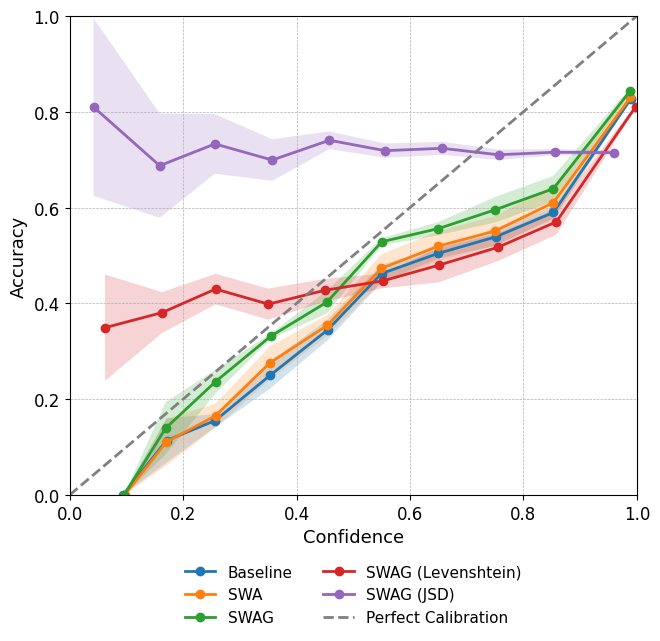

In [7]:
# Plot reliability curve

def plot_avg_reliability_curves_with_variation(
    method_runs,  # List of (list of prediction runs, confidence_fn, label)
    n_bins=10,
    figsize=(7, 7)
):
    bin_boundaries = np.linspace(0.0, 1.0, n_bins + 1)
    plt.figure(figsize=figsize)

    for prediction_runs, confidence_fn, label in method_runs:
        all_bin_accs = []
        all_bin_confs = []

        for predictions in prediction_runs:
            confidences = np.array([confidence_fn(p) for p in predictions])
            correctness = np.array([p['correct'] for p in predictions])
            bin_acc = []
            bin_conf = []

            for i, (lower, upper) in enumerate(zip(bin_boundaries[:-1], bin_boundaries[1:])):
                if i == n_bins - 1:
                    in_bin = (confidences >= lower) & (confidences <= upper)
                else:
                    in_bin = (confidences >= lower) & (confidences < upper)

                if np.any(in_bin):
                    bin_accuracy = np.mean(correctness[in_bin])
                    bin_confidence = np.mean(confidences[in_bin])
                else:
                    bin_accuracy = np.nan
                    bin_confidence = np.nan

                bin_acc.append(bin_accuracy)
                bin_conf.append(bin_confidence)

            all_bin_accs.append(bin_acc)
            all_bin_confs.append(bin_conf)

        # Convert to arrays for statistics
        all_bin_accs = np.array(all_bin_accs)
        all_bin_confs = np.array(all_bin_confs)

        # Compute mean and std across runs
        mean_acc = np.nanmean(all_bin_accs, axis=0)
        mean_conf = np.nanmean(all_bin_confs, axis=0)
        std_acc = np.nanstd(all_bin_accs, axis=0)

        mask = ~np.all(np.isnan(all_bin_confs), axis=0)
        
        # Plot mean line
        plt.plot(mean_conf[mask], mean_acc[mask], marker='o', label=label, lw=2, markersize=6)

        # Plot shaded std area
        plt.fill_between(mean_conf[mask],
                         (mean_acc - std_acc)[mask],
                         (mean_acc + std_acc)[mask],
                         alpha=0.2)

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Perfect Calibration", lw=2)
    plt.xlabel("Confidence", fontsize=13)
    plt.ylabel("Accuracy", fontsize=13)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # Move legend to the bottom with two columns
    plt.legend(fontsize=11, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.3), frameon=False)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

method_runs = [
    (all_base_preds, lambda p: p['softmax'], "Baseline"),
    (all_swa_preds, lambda p: p['softmax'], "SWA"),
    (all_swag_preds, lambda p: p['softmax'], "SWAG"),
    (all_swag_preds, lambda p: 1 - p['transformed_levenshtein'], "SWAG (Levenshtein)"),
    (all_swag_preds, lambda p: 1 - p['transformed_jsd'], "SWAG (JSD)"),
]

plot_avg_reliability_curves_with_variation(method_runs)

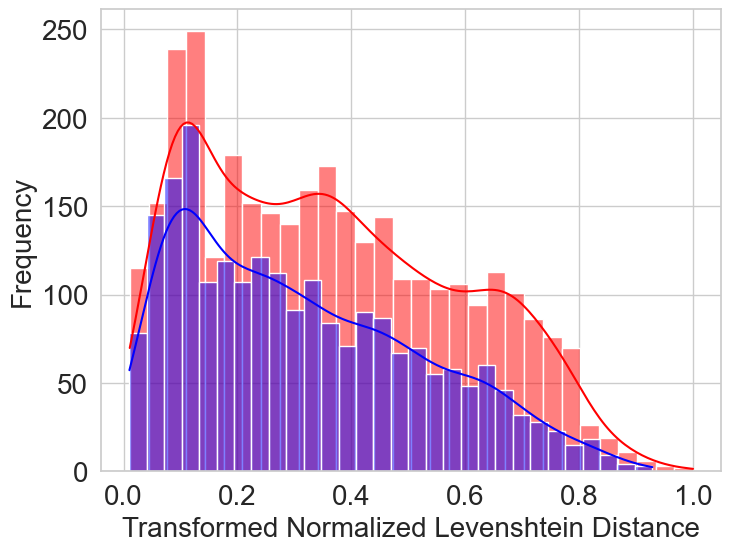

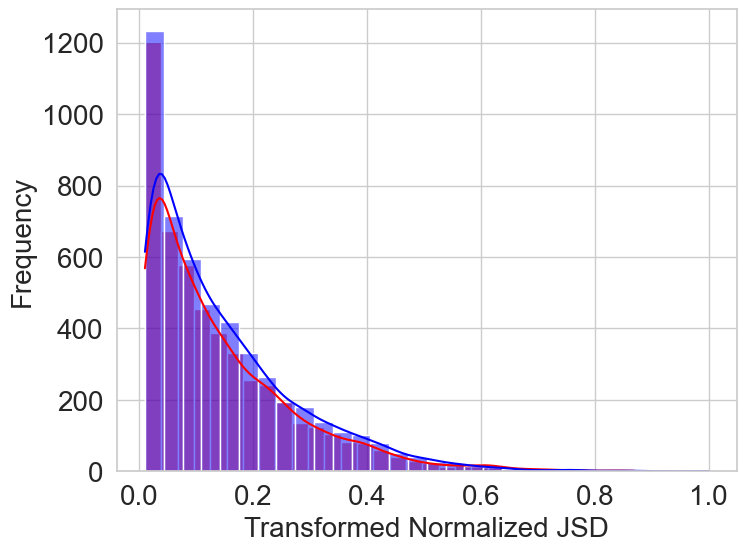

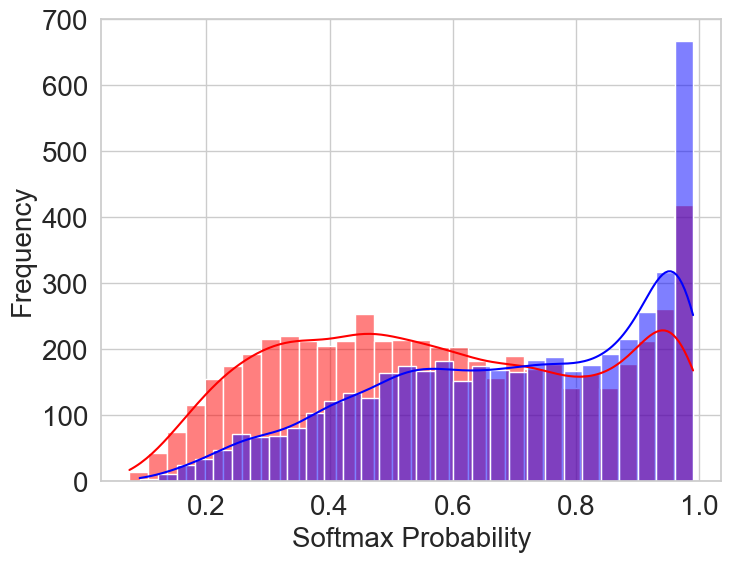

In [8]:
# Metric distributions for answerable and unanswerable questions from one run

noans_scores = []
has_ans_scores = []

for pred in swag_predictions_v2false_1:
    if pred['no_ans'] == 1 and pred['transformed_levenshtein'] > 0.01:
        noans_scores.append(pred['transformed_levenshtein'])
    elif pred['no_ans'] == 0 and pred['transformed_levenshtein'] > 0.01:
        has_ans_scores.append(pred['transformed_levenshtein'])

# Visualize the distributions
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

sns.histplot(noans_scores, color="red", kde=True, bins=30)
sns.histplot(has_ans_scores,  color="blue", kde=True, bins=30)
plt.xlabel("Transformed Normalized Levenshtein Distance", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

noans_scores = []
has_ans_scores = []

for pred in swag_predictions_v2false_1:
    if pred['no_ans'] == 1 and pred['transformed_jsd'] > 0.01:
        noans_scores.append(pred['transformed_jsd'])
    elif pred['no_ans'] == 0 and pred['transformed_jsd'] >0.01:
        has_ans_scores.append(pred['transformed_jsd'])

# Visualize the distributions
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

sns.histplot(noans_scores, color="red", kde=True, bins=30)
sns.histplot(has_ans_scores,  color="blue", kde=True, bins=30)
# Tick font sizes
plt.xlabel("Transformed Normalized JSD", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

noans_scores = []
has_ans_scores = []

for pred in swag_predictions_v2false_1:
    if pred['no_ans'] == 1 and pred['softmax'] < 0.99:
        noans_scores.append(pred['softmax'])
    elif pred['no_ans'] == 0  and pred['softmax'] < 0.99:
        has_ans_scores.append(pred['softmax'])

# Visualize the distributions
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

sns.histplot(noans_scores, color="red", kde=True, bins=30)
sns.histplot(has_ans_scores, color="blue", kde=True, bins=30)
plt.xlabel("Softmax Probability", fontsize=20)
plt.ylabel("Frequency", fontsize=20)

# Tick font sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

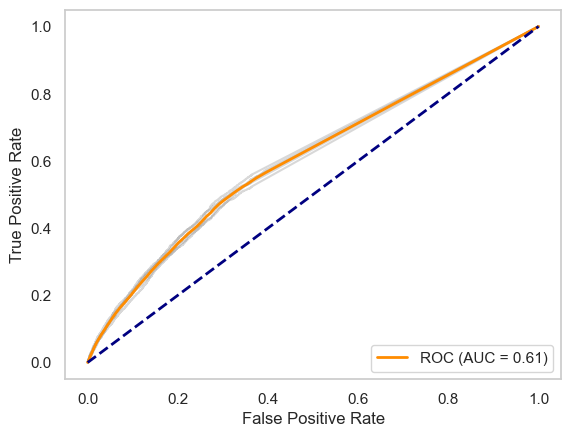

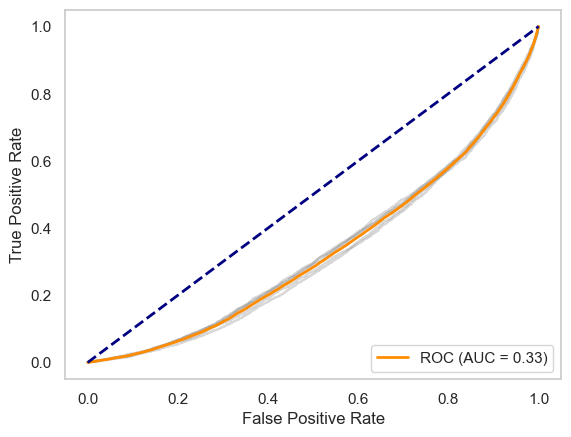

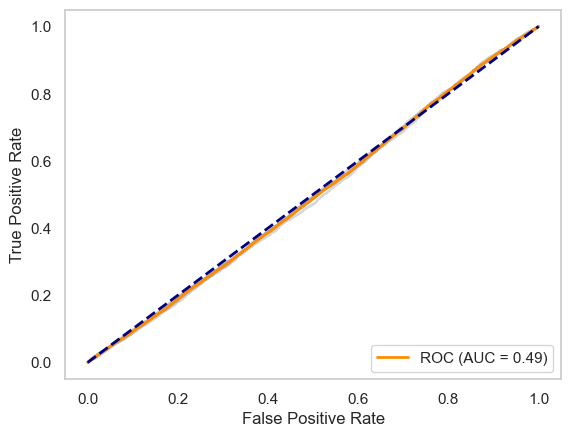

(array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
        0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
        0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
        0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
        0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
        0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
        0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
        0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
        0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
        0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
        0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
        0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
        0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
        0.70707071, 0.71717172, 0.72727273, 0.73

In [9]:
# ROC and AUC 

def calculate_average_roc(prediction_runs, binary_var, uncertainty_key='uncertainty_score'):
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    plt.figure()

    for preds in prediction_runs:
        y_true = [p[binary_var] for p in preds]
        y_scores = [p[uncertainty_key] for p in preds]
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(auc(fpr, tpr))
        plt.plot(fpr, tpr, alpha=0.3, color='grey')  # individual ROC curve

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)

    plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label=f'ROC (AUC = {mean_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()

    return mean_fpr, mean_tpr, mean_auc

# Calculate ROC for transformed Levenshtein, softmax, and transformed JSD
calculate_average_roc(all_swag_preds_2, 'incorrect_noans', 'transformed_levenshtein')
calculate_average_roc(all_swag_preds_2, 'incorrect_noans', 'softmax')
calculate_average_roc(all_swag_preds_2, 'incorrect_noans', 'transformed_jsd')

In [10]:
# Get highly uncertain predictions for qualitative analysis

filtered_preds = [pred for pred in swag_predictions_1 if pred["normalized_levenshtein"] > 0.9]
# Print the filtered predictions
print(len(filtered_preds))
# Initialize lists for ids and levenshtein distances
ids = []
ld = []
# Iterate through each prediction and extract the necessary data
for pred in filtered_preds:
    if isinstance(pred, dict):  # In case it's a dictionary
        ids.append(pred.get('id', None))  # Safely get 'id', or None if not present
        ld.append(pred.get('normalized_levenshtein', None))  # Safely get 'normalized_levenshtein', or None if not present

print(ids)
print(ld)

12
['5a6374de68151a001a9222e6', '5729f0db6aef051400155127', '5a2ec77ba83784001a7d2466', '57265700dd62a815002e8210', '5728e3c33acd2414000e0134', '572826634b864d19001645c0', '5727ee372ca10214002d99ed', '5729f60caf94a219006aa6f3', '572945b11d04691400779232', '57299d1c1d04691400779583', '572f609ca23a5019007fc5b1', '572fadcbb2c2fd140056832a']
[0.9773380843338456, 0.9173520528936495, 0.9004573322812681, 0.9740401225606866, 0.9085241577230357, 0.9374814074134642, 0.9786521476057077, 0.9907875930069282, 0.9222787582877118, 0.9358544880690065, 0.9688657387695919, 1.0]
